In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ts_modelling.data_producer import DataProducer
from ts_modelling.simple_experiment import SimpleExp
from argparse import Namespace
import yaml
import torch
%matplotlib inline

with open('forgetting_exp_args.yaml', 'r') as file:
    config = yaml.safe_load(file)
args = Namespace(**config)

A: Malmo B: Katterjakk
- take one method for learning
- Train fully on A
- Test on A
- Test out of box on B
- set learning rate to last lr in training
- repeat 10 times:
    - Train one epoch on B 
    - Test on A & B

- If performance is completely flipped early:
  - Decrease LR even more

In [4]:
A = 'temp_malmo_small'
B = 'temp_katterjakk_small'
exp = SimpleExp(args)
exp.args.model_name = f'forgetting_exp_train-{A}-{args.train_epochs}_{B}-{0}'
exp.train()
exp.test(A + '.csv')
exp.test(B + '.csv')
exp.args.lr = exp.args.lr * 0.01
exp.swap_train_data(B+'.csv')
for i in range(10):
    exp.train(1)
    exp.args.model_name = f'forgetting_exp_train-{A}-{args.train_epochs}_{B}-{i+1}'
    exp.test(A + '.csv')
    exp.test(B + '.csv')
    

Use CPU
Trainable parameters:      205344
Total parameters:          205347
Training on data: temp_katterjakk_small.csv
train 11738
val 1562
test 3313
Validation loss decreased (inf --> 29.263213).  Saving model ...
Updating learning rate to None
Total training time: 0 minutes 20.973959922790527 seconds
test 3313
Testing forgetting_exp_train-temp_malmo_small-1_temp_katterjakk_small-0 on temp_malmo_small.csv
test 3313
Testing forgetting_exp_train-temp_malmo_small-1_temp_katterjakk_small-0 on temp_katterjakk_small.csv
Trainable parameters:      205344
Total parameters:          205347
Training on data: temp_katterjakk_small.csv
train 11738
val 1562
test 3313
Validation loss decreased (inf --> 29.323605).  Saving model ...
Updating learning rate to 7.15019408995335e-14
Total training time: 0 minutes 17.00571870803833 seconds
test 3313
Testing forgetting_exp_train-temp_malmo_small-1_temp_katterjakk_small-1 on temp_malmo_small.csv
test 3313
Testing forgetting_exp_train-temp_malmo_small-1_te

KeyboardInterrupt: 

In [3]:
pd.read_csv('./test_results/metrics.csv')

,model_name,pretrain_data,train_head_data,finetune_data,test_data,mae,mse,rmse,mape,mspe,rse,nrv
0,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_malmo_small,2.778853,12.995366,3.604909,152.71893,2.353503e+07,0.493615,0.234170
1,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_katterjakk_small,3.222678,16.726480,4.089802,4418.83740,2.556415e+09,0.520487,0.259469
2,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_malmo_small,2.778853,12.995366,3.604909,152.71893,2.353503e+07,0.493615,0.234170
3,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_katterjakk_small,3.222678,16.726480,4.089802,4418.83740,2.556415e+09,0.520487,0.259469
4,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_malmo_small,2.778853,12.995366,3.604909,152.71893,2.353503e+07,0.493615,0.234170
5,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_katterjakk_small,3.222678,16.726480,4.089802,4418.83740,2.556415e+09,0.520487,0.259469
6,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_malmo_small,2.778853,12.995366,3.604909,152.71893,2.353503e+07,0.493615,0.234170
7,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_katterjakk_small,3.222678,16.726480,4.089802,4418.83740,2.556415e+09,0.520487,0.259469
8,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_malmo_small,2.778853,12.995366,3.604909,152.71893,2.353503e+07,0.493615,0.234170
9,forgetting_exp_train-temp_malmo_small-1_temp_k...,supervised-0,supervised-0,temp_malmo-1,temp_katterjakk_small,3.222678,16.726480,4.089802,4418.83740,2.556415e+09,0.520487,0.259469


In [11]:
exp.test()

test 23335
Testing TBD on temp_katterjakk.csv


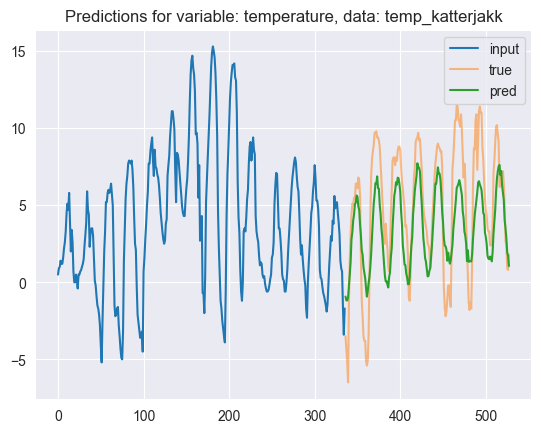

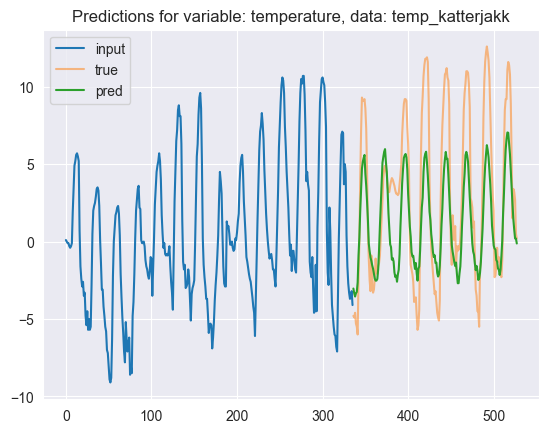

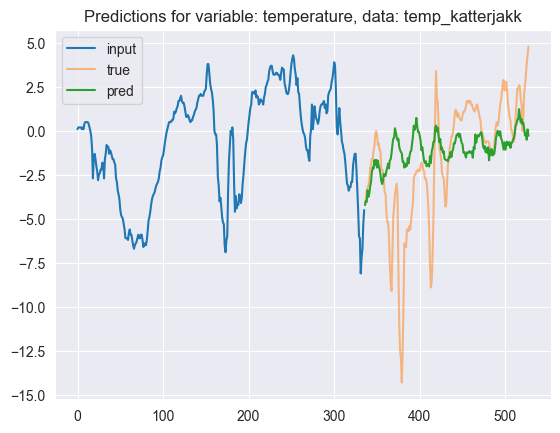

In [12]:
exp.plot_preds()